# Linear Regression Process Notebook

Advertising Dataset:
https://www.kaggle.com/ashydv/advertising-dataset

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, SCORERS

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV, ElasticNetCV

import scipy as sp
from joblib import dump,load

In [5]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/Advertising.csv")

In [6]:
df.shape

(200, 4)

In [7]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [15]:
df["Total"] = df["TV"] + df["radio"] + df["newspaper"]

# Simple Linear Regression

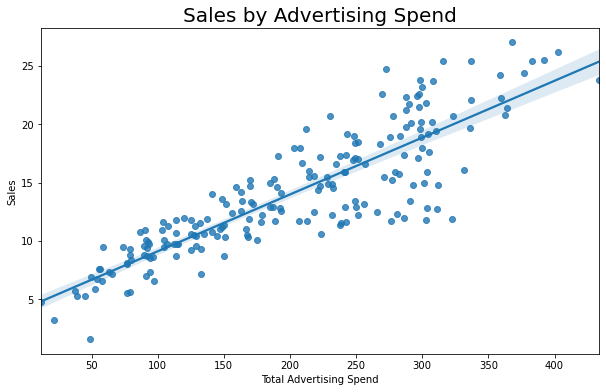

In [25]:
# Plot regression line and scatter
plt.figure(figsize = (10,6))
sns.regplot(data = df, x = "Total",y = "sales")
plt.title("Sales by Advertising Spend", fontsize = 20)
plt.xlabel("Total Advertising Spend")
plt.ylabel("Sales");

Clear linear relationship, higher advertising spend results in higher sales

In [26]:
X = df["Total"]
y = df["sales"]

In [29]:
# Create y = mx+c equation
np.polyfit(X,y, deg = 1 )

array([0.04868788, 4.24302822])

In [31]:
# Create an array
possible_advertising = np.linspace(0,500,100)
potential_sales = possible_advertising*0.04868788+4.24302822

In [36]:
print(potential_sales)

[ 4.24302822  4.4889266   4.73482499  4.98072337  5.22662176  5.47252014
  5.71841852  5.96431691  6.21021529  6.45611367  6.70201206  6.94791044
  7.19380883  7.43970721  7.68560559  7.93150398  8.17740236  8.42330075
  8.66919913  8.91509751  9.1609959   9.40689428  9.65279266  9.89869105
 10.14458943 10.39048782 10.6363862  10.88228458 11.12818297 11.37408135
 11.61997974 11.86587812 12.1117765  12.35767489 12.60357327 12.84947165
 13.09537004 13.34126842 13.58716681 13.83306519 14.07896357 14.32486196
 14.57076034 14.81665873 15.06255711 15.30845549 15.55435388 15.80025226
 16.04615064 16.29204903 16.53794741 16.7838458  17.02974418 17.27564256
 17.52154095 17.76743933 18.01333771 18.2592361  18.50513448 18.75103287
 18.99693125 19.24282963 19.48872802 19.7346264  19.98052479 20.22642317
 20.47232155 20.71821994 20.96411832 21.2100167  21.45591509 21.70181347
 21.94771186 22.19361024 22.43950862 22.68540701 22.93130539 23.17720378
 23.42310216 23.66900054 23.91489893 24.16079731 24

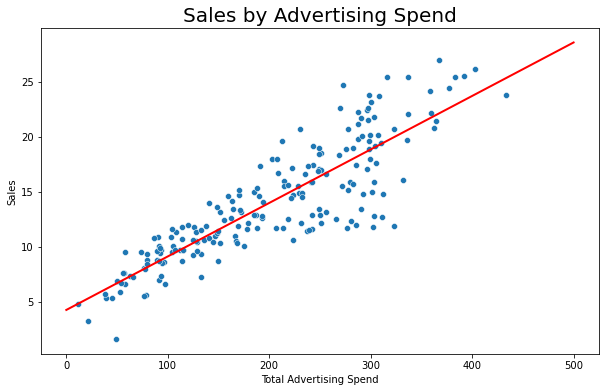

In [46]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Total", y = "sales")
plt.plot(possible_advertising, potential_sales, color = "r", linewidth = 2)
plt.title("Sales by Advertising Spend", fontsize = 20)
plt.xlabel("Total Advertising Spend")
plt.ylabel("Sales");

In [47]:
spend = 200
predicted_sales = spend*0.04868788 + 4.24302822
predicted_sales

13.98060422

In [48]:
# Try polynomial - no real relationship then then coefficients will be very small
np.polyfit(X,y, deg = 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [49]:
pot_spend = np.linspace(0,500,100)
pred_sales = 3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00
pred_sales

array([ 2.70495053,  3.11474825,  3.51512186,  3.90630911,  4.28854779,
        4.66207567,  5.02713053,  5.38395013,  5.73277224,  6.07383466,
        6.40737513,  6.73363145,  7.05284138,  7.3652427 ,  7.67107318,
        7.97057059,  8.2639727 ,  8.5515173 ,  8.83344215,  9.10998503,
        9.38138371,  9.64787596,  9.90969955, 10.16709227, 10.42029188,
       10.66953616, 10.91506288, 11.15710981, 11.39591473, 11.63171541,
       11.86474963, 12.09525515, 12.32346975, 12.54963121, 12.77397729,
       12.99674578, 13.21817443, 13.43850104, 13.65796337, 13.87679919,
       14.09524628, 14.31354241, 14.53192536, 14.75063289, 14.96990278,
       15.18997281, 15.41108075, 15.63346437, 15.85736144, 16.08300974,
       16.31064705, 16.54051112, 16.77283975, 17.0078707 , 17.24584174,
       17.48699065, 17.73155521, 17.97977318, 18.23188233, 18.48812045,
       18.74872531, 19.01393467, 19.28398632, 19.55911802, 19.83956755,
       20.12557268, 20.41737119, 20.71520085, 21.01929943, 21.32

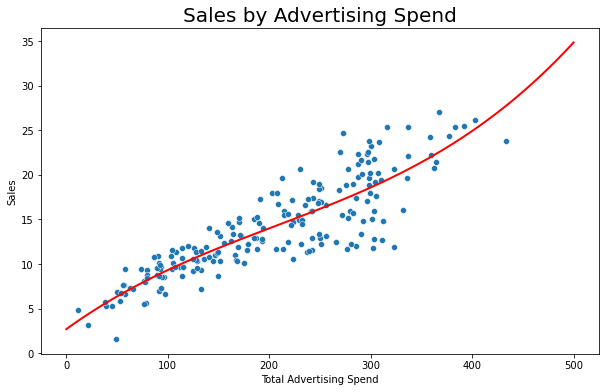

In [51]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = "Total", y = "sales")
plt.plot(pot_spend, pred_sales, color = "r", linewidth = 2)
plt.title("Sales by Advertising Spend", fontsize = 20)
plt.xlabel("Total Advertising Spend")
plt.ylabel("Sales");

Could be fitting the data better but not able to tell without metrics

# Multiple Linear Regression

In [54]:
df.head()

,TV,radio,newspaper,sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [55]:
df.describe()

,TV,radio,newspaper,sales,Total
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,200.860500
std,85.854236,14.846809,21.778621,5.217457,92.985181
min,0.700000,0.000000,0.300000,1.600000,11.700000
25%,74.375000,9.975000,12.750000,10.375000,123.550000
50%,149.750000,22.900000,25.750000,12.900000,207.350000
75%,218.825000,36.525000,45.100000,17.400000,281.125000
max,296.400000,49.600000,114.000000,27.000000,433.600000


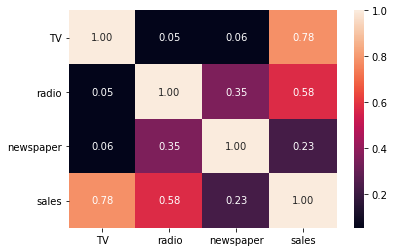

In [115]:
sns.heatmap(df.drop("Total", axis = 1).corr(), annot = True, fmt = ".2f");

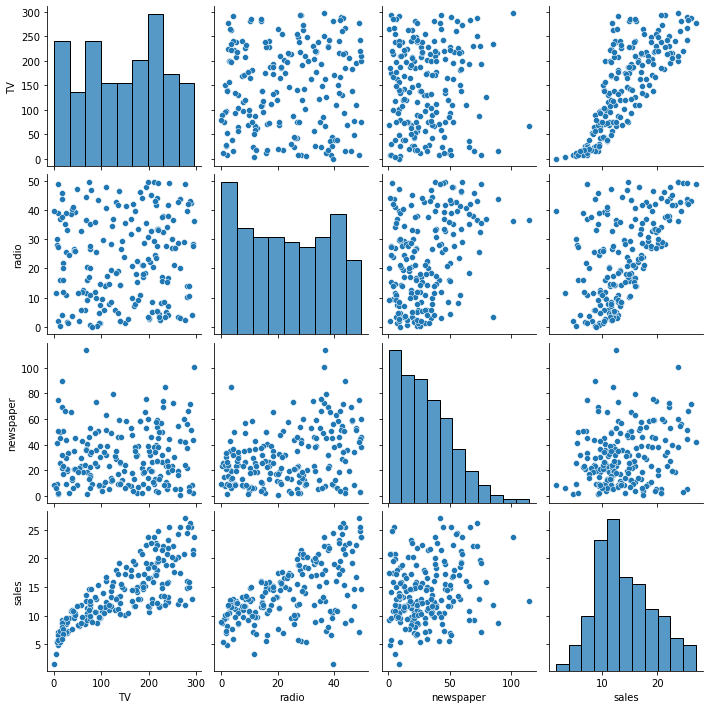

In [61]:
sns.pairplot(df.drop("Total",axis = 1));

In [59]:
X = df[["TV","radio","newspaper"]]
y = df["sales"]

In [79]:
# Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 101)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(140, 3) (60, 3) (140,) (60,)


In [80]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [81]:
y_pred = model.predict(X_test)
y_pred[0:10]

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224])

In [82]:
# Mean absolute error (note doesn't do well with points that are outliers)
mean_absolute_error(y_test, y_pred)

1.2137457736144805

In [83]:
# Mean squared error (punish values which are outside the rest but can't compare to the mean directly)
mean_squared_error(y_test,y_pred)

2.298716697886378

In [84]:
# Root mean squared error (can compare to the mean)
np.sqrt(mean_squared_error(y_test, y_pred))

1.5161519375993877

Judge the results in terms of the data average sales values and the distribution

In [85]:
# The mean of the sales data
df["sales"].mean()

14.022500000000003

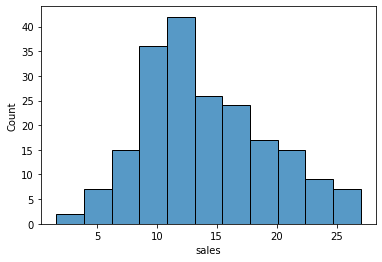

In [86]:
sns.histplot(df["sales"]);

## Residuals

Plots can help to determine if linear regression is an appropriate method. Anscombes quartet is an example of this, where the mean and variance is the same and the linear regression line is the same but the plots show the data is very different and linear regression is not suitable.

Can look at the residuals. Residuals should be random and normally distributed with mean zero.

In [91]:
# Plot residual errors against the original y values
residuals = y_test - y_pred
residuals[0:10]

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
Name: sales, dtype: float64

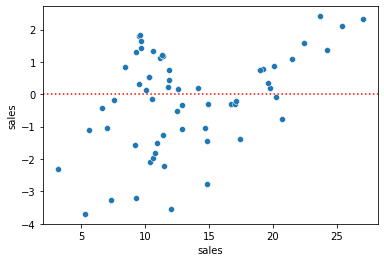

In [96]:
# Plot scatterplot of the y actual against residuals
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = "red",linestyle = ":");

The datapoints appear random

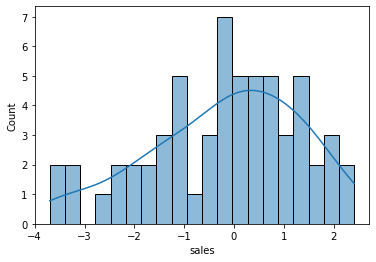

In [101]:
# Distribution of the residuals
sns.histplot(x = residuals, kde = True, bins = 20);

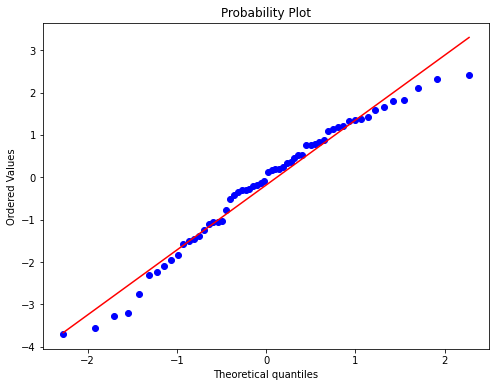

In [103]:
# Probability plot (points should fit along the line)
fig, ax = plt.subplots(figsize = (8,6))
ax = sp.stats.probplot(residuals, plot = ax)

## Deploy the Model

In [104]:
# Run the model on the full dataset
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [105]:
# Get the coefficients
model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

The coefficient for newpapers is basically zero, so regardless of what is spend, there is no effect on sales and in fact as it is negative it will lower sales. The coefficient for radio and tv is positive with radio having the most impact. If you hold the newspaper and radio fixed, a one unit increase in spending on tv will results in an increase of 0.045 in sales. Therefore a $1000 extra spend on radio advertising will return 45 extra sales.

In [106]:
# Intercept
model.intercept_

2.9388893694594085

In [118]:
y_hat = model.predict(X)

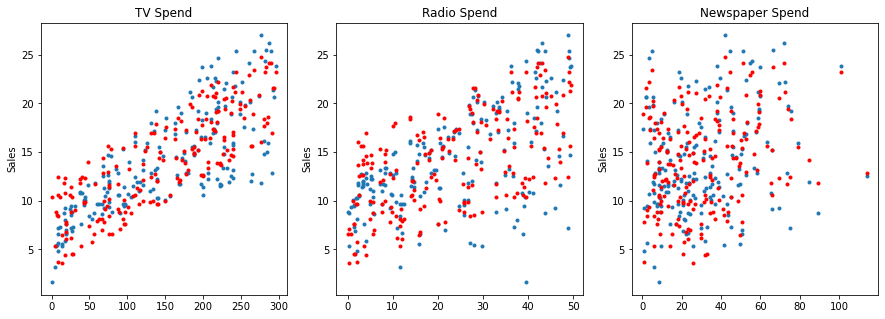

In [131]:
# Compare regression predictions and actual feature values

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
axs[0].plot(df["TV"], df['sales'],'o', markersize = 3)
axs[0].plot(df['TV'], y_hat,'o',color = "red", markersize = 3)
axs[0].set_ylabel("Sales")
axs[0].set_title("TV Spend")

axs[1].plot(df["radio"], df['sales'],'o', markersize = 3)
axs[1].plot(df['radio'], y_hat,'o',color = "red", markersize = 3)
axs[1].set_ylabel("Sales")
axs[1].set_title("Radio Spend")

axs[2].plot(df["newspaper"], df['sales'],'o', markersize = 3)
axs[2].plot(df['newspaper'], y_hat,'o',color = "red", markersize = 3)
axs[2].set_ylabel("Sales")
axs[2].set_title("Newspaper Spend");

Note that features may be in different units (and are likely to be), so the data needs to be normalised if the units are different.

In [133]:
# Saving model to send to someone else
#dump(model,'final_sales_model.joblib')

In [ ]:
# Reload model
#model = load('final_sales_model.joblib')

In [134]:
# What sales are we likely to get from a campaign spending 149 on tv, 22 on radio and 12 on newspapers
campaign = [[149,22,12]]
model.predict(campaign)

array([13.893032])

# Polynomial Regression

* Useful if the feature is non-linear in nature
* Also if features have some inter-relationship between them. Can create an interaction term. The polynomial features tool in scikit learn is useful

In [135]:
df.head()

,TV,radio,newspaper,sales,Total
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [146]:
X = df.drop(["sales","Total"],axis = 1)
y = df["sales"]

In [168]:
# Define polynomial - include interaction features as well as squared
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False) # don't need bias term for this task
poly.fit(X)

PolynomialFeatures(include_bias=False)

In [ ]:
PolynomialFeatures

In [148]:
# Transform to get the original terms, polynomial and interaction terms. Note there is no intercept in this example
## if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]
poly_features = poly.transform(X)
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [149]:
# If you square the terms, and calculate interaction terms from an example row, this will equal the features above
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [176]:
print("TV squared:",230.1*230.1)
print("TV with radio:",230.1*37.8)
print("TV with newspapers:",230.1*69.2)
print("Radio squared:",37.8*37.8)
print("Radio with newspapers:",37.8*69.2)
print("Newpapers squared:",69.9*69.2)

TV squared: 52946.009999999995
TV with radio: 8697.779999999999
TV with newspapers: 15922.92
Radio squared: 1428.8399999999997
Radio with newspapers: 2615.7599999999998
Newpapers squared: 4837.080000000001


In [160]:
# Train test split - keep the random_state and test size the same in order to compare with the previous model
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)

In [161]:
# Fit and train the model and predict on test set
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [162]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

Some of the coefficients are very small indicating they have little impact on the model, for example the last coefficient is for newspapers squared. The most important coeficients are the main three and some of the interaction coefficients.

In [163]:
# Evaluation metrics
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))
print(poly_features.mean())

0.48967980448037024
0.6646431757269196
4470.627166666666


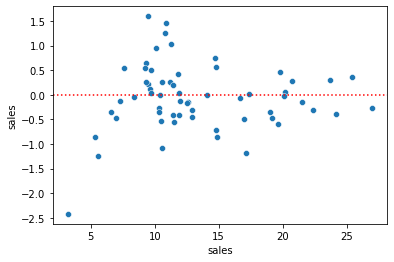

In [167]:
# Residuals
residuals = y_test - y_pred
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = "red",linestyle = ":");

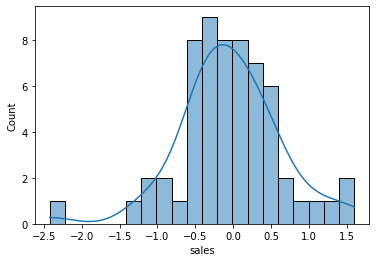

In [165]:
# Distribution of the residuals
sns.histplot(x = residuals, kde = True, bins = 20);

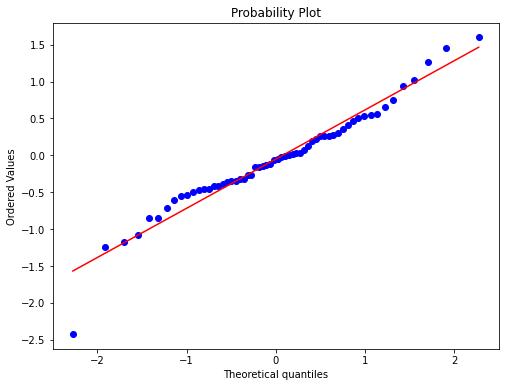

In [166]:
# Probability plot (points should fit along the line)
fig, ax = plt.subplots(figsize = (8,6))
ax = sp.stats.probplot(residuals, plot = ax)

## Bias Variance Trade Off (Overfitting Versus Underfitting)

* Overfitting fits too well to the noise in a dataset. The model will then likely peform badly against test set - TOO MUCH VARIANCE.
* If a model hits all points, the training error will be zero so new data will results in a large test error.
* Underfitting - the model does not capture the trend in the data or fit to the training data and will not fit the test set either. The model is often too simple, it is generalising too much - TOO MUCH BIAS.
* Finding under and overfitting with multi-dimensional datasets cannot be visually assessed, so need to plot error against model complexity. 
* Complexity is a higher order polynomial. A good model would have a lower error as you increase complexity, so the polynomial degree being increased. A bad model would have an increase in error as the complexity increases.
* Model performance on training versus test set is important to see where the optimal complexity is found.

## Choose degree of polynomial

In [180]:
# Set up empty lists
train_rmse_list = []
test_rmse_list = []

# Perform linear regression using a range of polynomial features
for degree in range(1,10):    # can use more if the dataset has a lot of features
    poly = PolynomialFeatures(degree = degree, include_bias = False)
    poly_features = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size = 0.3, random_state = 101)
    model = LinearRegression()
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
    train_rmse_list.append(train_rmse)
    test_rmse_list.append(test_rmse)

In [181]:
# There is a clear spike at high ploynomial levels
train_rmse_list

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.351708368839935,
 0.2509342952029377,
 0.19933332834273687,
 5.421421599418674,
 0.14237972100735358,
 0.16675080562534683]

In [182]:
test_rmse_list

[1.5161519375993873,
 0.6646431757269196,
 0.5803286825231458,
 0.5077742624232122,
 2.575824760343602,
 4.490868529264996,
 1381.4042358385857,
 4449.568197230342,
 95893.02658131701]

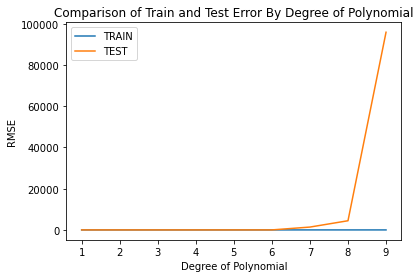

In [191]:
plt.plot(range(1,10),train_rmse_list, label = "TRAIN")
plt.plot(range(1,10),test_rmse_list, label = "TEST")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()
plt.title("Comparison of Train and Test Error By Degree of Polynomial");

At 6 degrees of polynomial the test error starts to increase relative to the training error

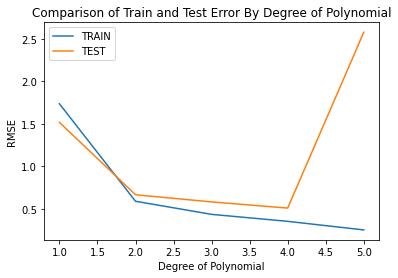

In [192]:
# Zoom in to the range of interest
plt.plot(range(1,6),train_rmse_list[0:5], label = "TRAIN")
plt.plot(range(1,6),test_rmse_list[0:5], label = "TEST")
plt.xlabel("Degree of Polynomial")
plt.ylabel("RMSE")
plt.legend()
plt.title("Comparison of Train and Test Error By Degree of Polynomial");

May not be worth the added complexity of 4 degrees, even if the performance is better. A second or maybe third degree is probably the best option.

## Deploy and Save the Polynomial Model

In [193]:
# Create final polynomial. Use all the dataset here 
final_poly = PolynomialFeatures(include_bias = False, degree = 3)
final_X = final_poly.fit_transform(X)
final_model = LinearRegression()
final_model.fit(final_X,y)

LinearRegression()

In [196]:
# Save with joblib
# dump(final_model,final_model.joblib)
# dump(final_poly,final_poly.joblib)

In [ ]:
# Bring in model and use for prediction
# model = load(final_model.joblib)
# poly = load(final_poly.joblib)

In [197]:
# New campaign but need more features than three
#campaign = [[149,22,12]]
#transformed = poly.fit_transform(campaign) # will create the features needed
#model.predict(transformed)

# Feature Scaling

* Improves convergence when features have different scales - weights take longer to update with gradient descent, performance can be increased considerably.
* Some models based on distance like KNN require it and some do not as scaling has no effect (eg decision tree based)
* Also helpful if features have different units
* New data needs to be scaled to models based on feature scaled variables but it is difficult to interpret
* Standardisation rescales to mean 0 and st dev 1 so standardising to follow a standard normal distribution (z-score)
* Normalisation rescales to get all values between 0 and 1 (X-min)/(max-min)
* Scaling is fit to the training set only and transform is used on the test set
* Don't scale the target

# Cross-validation

* Allows training and evaluation on all the data
* Gives an average error which gives a much better idea of the model performance across multiple splits as it is evaluated on all data and tested each piece of data
* The downside is computational expense especially for large datasets
* k = 10 is the usual number of splits so each split is 10% of the data.
* Can set k to the number of rows in the dataset but this is very expensive (leave one out validation)
* Can use a hold out test or validation set as well as training and test set, this set never gets seen by the model during hyperparameter tuning adjustments. Hyperparameter tuning can be against cross validation or train and test sets. The holdout is not touched at all.
* Can hyperparameter tune within the cross validation

# Regularization

* Reduce overfitting and variance
* L1, L2 and combined L1 and L2
* L1 adds penalty term to limit the absolute value of coefficients in the model. Some may become zero, in effect removing them.
* L2 adds penalty term equal to square of the magnitude of the coefficients so they are shrunk but not eliminated.

## Ridge Regression

* The penalty term is based on the squared value of the coefficients 
* The shrinkage term has a lambda value to determine how strong the penalty is. If lambda = 0, the is no shrinkage penalty.
* More bias and less variance introduced to the model, so generalise better to unseen data.
* With lambda = 1, then large slopes are penalised as small increases in B1 (slope of line) squared so the slope is lowered
* Try different values for lambda and look at the metrics
* Within scikit learn the tunable lamda is referred to as alpha for uniformity across all models
* Also a negative RMSE is used as score metric so a higher value is BETTER again for uniformity

In [199]:
df = pd.read_csv("C:/Users/Imy Hull/datasets/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [252]:
X = df.drop("sales", axis = 1)
y = df.sales

In [253]:
# Create polynomial dataset
poly = PolynomialFeatures(degree = 3, include_bias = False)
poly_features = poly.fit_transform(X)

In [276]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y,test_size = 0.3, random_state = 101)

In [277]:
# Scale the data
scale = StandardScaler()
X_train = scale.fit_transform(X_train) # fit transform training set
X_test = scale.transform(X_test) # transform the test set

In [278]:
# Train model and predict with a starter value for alpha
ridge = Ridge(alpha = 10)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

In [279]:
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.5774404204714171
0.8946386461319646


In [280]:
# All scoring - note negative in this case
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [281]:
# Need to test a variety of alpha parameters to find the optimum value
ridgecv = RidgeCV(alphas=(0.1, 1.0, 10.0), cv = 10, scoring = 'neg_mean_absolute_error')
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10,
        scoring='neg_mean_absolute_error')

In [282]:
ridgecv.alpha_

0.1

In [283]:
# Ridge CV returned a better MAE than the previous model
y_pred = ridgecv.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.4273774884329222

In [284]:
np.sqrt(mean_squared_error(y_test, y_pred))

0.6180719926963387

In [285]:
# Note none of the coefficients are zero
ridgecv.coef_

array([ 5.40769392,  0.5885865 ,  0.40390395, -6.18263924,  4.59607939,
       -1.18789654, -1.15200458,  0.57837796, -0.1261586 ,  2.5569777 ,
       -1.38900471,  0.86059434,  0.72219553, -0.26129256,  0.17870787,
        0.44353612, -0.21362436, -0.04622473, -0.06441449])

In [286]:
# From the model the highest negative mean absolute error score is returned
ridgecv.best_score_

-0.38659111742247343

## Lasso Regression

* Adds penalty term equal to the absolute value of the magnitude of the coefficients which limits the size
* Some coefficients can return to zero if the lambda is sufficiently large
* Models can be easier to interpret
* There are many different Lasso models in the scikit learn implementation eg LassoLars (least angle)
* esps = ratio of alpha min to alpha max (a smaller number means more being checked)

In [303]:
# Set up the Lasso model
lassocv = LassoCV(eps=0.1,n_alphas=100,cv=5)
lassocv.fit(X_train,y_train)

LassoCV(cv=5, eps=0.1)

In [304]:
# Find the best alpha
lassocv.alpha_

0.4943070909225832

In [306]:
# Test predictions and get the MAE
y_pred = lassocv.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.6541723161252854
1.1308001022762533


In [307]:
lassocv.coef_

array([1.002651  , 0.        , 0.        , 0.        , 3.79745279,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

Lasso does not seem to be giving as good results as Ridge Regression but the coefficients show than most have been set to zero, so the model is only considering two of the features. The results are quite good even though two features are used.

In [308]:
# Change the hyperparameters of the model
lassocv = LassoCV(eps=0.001,n_alphas=100,cv=5, max_iter = 1000000)
lassocv.fit(X_train,y_train)
print(lassocv.alpha_)
y_pred = lassocv.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.004943070909225833
0.43350346185900623
0.6063140748984029


In [309]:
lassocv.coef_

array([ 4.86023329,  0.12544598,  0.20746872, -4.99250395,  4.38026519,
       -0.22977201, -0.        ,  0.07267717, -0.        ,  1.77780246,
       -0.69614918, -0.        ,  0.12044132, -0.        , -0.        ,
       -0.        ,  0.        ,  0.        , -0.        ])

## Elastic Net

In [312]:
# Define the model
elasticcv = ElasticNetCV(l1_ratio = [.1,.5,.7,.9,.95,.99], eps = 0.001, n_alphas = 100,max_iter = 1000000 )

In [313]:
elasticcv.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99], max_iter=1000000)

In [315]:
elasticcv.l1_ratio_

0.99

The value suggests that elastic net is leaning towards and l1 model rather than l2

In [317]:
elasticcv.alpha_

0.004993000918409929

In [316]:
# Test predictions and get the MAE
y_pred = elasticcv.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

0.43619389336623254
0.6104106917384734
